# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip install lseg.data
#!pip install cufflinks
#!pip install matplotlib
#!pip install seaborn

In [2]:
import sys
print(sys.version)

3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:21:42) [Clang 18.1.8 ]


In [3]:
import os
os.environ["LD_LIB_CONFIG_PATH"] = "../Configuration"

In [4]:
import lseg.data as ld

In [5]:
ld.open_session()

<lseg.data.session.Definition object at 0x106bf0310 {name='workspace'}>

In [8]:
df = ld.get_data(
        universe=['IBM.N', 'VOD.L'], 
        fields=['BID', 'ASK', 'TR.Revenue']
    )
print(df)

  Instrument      Revenue    BID  ASK
0      IBM.N  62753000000    0.0    0
1      VOD.L  36717000000  66.28   70


In [19]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [38]:
import pandas as pdf
import numpy as np
import cufflinks as cf  # Cufflinks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

### Numpy

In [9]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


In [17]:
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
arr[0][0]

1

In [18]:
type(arr)

numpy.ndarray

## Python Pandas

In [25]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
df


,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [28]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [24]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [29]:
data = ld.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [30]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,603.13,2627121,592.89,34.813805
1,IBM,255.84,3450462,254.4104,17.16054
2,GOOG.O,174.7,23512259,173.59,-8.26507
3,MSFT.O,399.73,19518054,394.245,-4.975732


In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [31]:
dax = ld.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [35]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,49.705,2720400,17.063118
1,IFXGn.DE,Infineon Technologies AG,36.935,2945582,18.696312
2,SIEGn.DE,Siemens AG,223.45,1369236,21.239707
3,EONGn.DE,E On Se,12.425,12586491,10.493553
4,DBKGn.DE,Deutsche Bank AG,20.9,9212705,25.600962
5,SATG_p.DE,Sartorius AG,246.0,98305,14.312268
6,SAPG.DE,SAP SE,275.2,1318253,16.462124
7,BAYGn.DE,Bayer AG,23.035,3037311,19.265818
8,RWEG.DE,RWE AG,30.67,1850094,6.382241
9,HNKG_p.DE,Henkel AG & Co KGaA,83.5,840322,-1.416765


In [33]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,49.705,2720400,17.063118
1,IFXGn.DE,Infineon Technologies AG,36.935,2945582,18.696312
2,SIEGn.DE,Siemens AG,223.45,1369236,21.239707
3,EONGn.DE,E On Se,12.425,12586491,10.493553
4,DBKGn.DE,Deutsche Bank AG,20.9,9212705,25.600962


In [36]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE     14.813943
IFXGn.DE     18.969473
SIEGn.DE     17.523028
EONGn.DE       7.29213
DBKGn.DE     20.823317
SATG_p.DE    10.315985
SAPG.DE       15.27719
BAYGn.DE     17.220669
RWEG.DE        4.61325
HNKG_p.DE    -1.251476
ZALG.DE      15.467737
DTEGn.DE     21.079958
MRCG.DE       -1.96569
PSHG_p.DE     6.217331
VOWG_p.DE    17.868374
BMWG.DE        8.48316
BEIG.DE       1.532258
HEIG.DE      18.818106
RHMG.DE       55.02766
MTXGn.DE     -4.037267
FMEG.DE        0.13587
FREG.DE       9.004174
DHLn.DE        9.85874
ALVG.DE      10.172356
MUVGn.DE      8.109218
CONG.DE       7.096575
SHLG.DE       7.685991
SY1G.DE      -4.705309
ADSGn.DE      3.505068
HNRGn.DE      2.361226
DTGGe.DE      14.68114
ENR1n.DE      2.302501
MBGn.DE      12.825279
BNRGn.DE      9.398756
CBKG.DE      28.712242
AIRG.DE       6.202253
VNAn.DE       0.375171
DB1Gn.DE     10.746403
QIA.DE      -12.463105
P911_p.DE     1.540568
Name: YTD Total Return, dtype: Float64

In [36]:
dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]


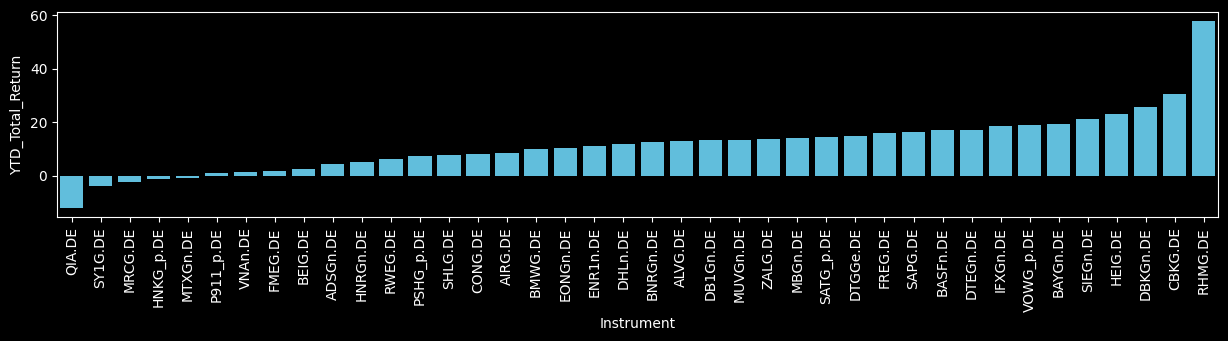

In [40]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [41]:
type(dax2)

pandas.core.frame.DataFrame

### Generen grafico para volumen de menor a mayor DJI

In [42]:
lp4 = ld.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [43]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,AAPL.OQ,APPLE INC ORD,6.1004,7588822.0,-110383.0
1,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,5.2773,3732734.0,-54268.0
2,LP40065886,NVDA.OQ,NVIDIA CORP ORD,4.7768,11679718.0,-171272.0
3,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,3.8458,4750252.0,-70396.0
4,LP40065886,META.OQ,META PLATFORMS INC ORD,2.5689,1094332.0,-16159.0
...,...,...,...,...,...,...
3157,LP40065886,,AMBIT BIOSCIENCES CORP CVR,0.0,29736.0,0.0
3158,LP40065886,CPSH.OQ,CPS TECHNOLOGIES CORP ORD,0.0,8161.0,0.0
3159,LP40065886,EKSO.OQ,EKSO BIONICS HOLDINGS INC ORD,0.0,14085.0,0.0
3160,LP40065886,,ALEXZA PHARMACEUTICALS INC CVR,0.0,80591.0,0.0


In [42]:
XLE= ld.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [43]:
XLE

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,22.3352,68023561.0,-3867773.0
1,XLE,CVX.N,CHEVRON CORP ORD,15.3769,33534651.0,-1906659.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.8841,25955197.0,-1475824.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.5814,26891791.0,-1529059.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.5146,11677179.0,-663910.0
5,XLE,OKE.N,ONEOK INC ORD,4.333,14508356.0,74106.0
6,XLE,SLB.N,SCHLUMBERGER NV ORD,4.0873,33014830.0,-1877248.0
7,XLE,KMI.N,KINDER MORGAN INC ORD,3.8166,45187756.0,-2569293.0
8,XLE,PSX.N,PHILLIPS 66 ORD,3.4979,9655322.0,-548940.0
9,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.365,7513740.0,-427290.0


In [44]:
XLE.columns = [c.replace(' ', '_') for c in XLE.columns]
list_values = ['USD CASH', 'OTHER ASSETS LESS LIABILITIES']
XLE[~XLE['Holding_Name'].isin(list_values)]

,Instrument,Holding_RIC,Holding_Name,Percentage_of_Fund_Assets,Number_of_Shares,Number_of_Shares_Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,22.3352,68023561.0,-3867773.0
1,XLE,CVX.N,CHEVRON CORP ORD,15.3769,33534651.0,-1906659.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.8841,25955197.0,-1475824.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.5814,26891791.0,-1529059.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.5146,11677179.0,-663910.0
5,XLE,OKE.N,ONEOK INC ORD,4.333,14508356.0,74106.0
6,XLE,SLB.N,SCHLUMBERGER NV ORD,4.0873,33014830.0,-1877248.0
7,XLE,KMI.N,KINDER MORGAN INC ORD,3.8166,45187756.0,-2569293.0
8,XLE,PSX.N,PHILLIPS 66 ORD,3.4979,9655322.0,-548940.0
9,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.365,7513740.0,-427290.0


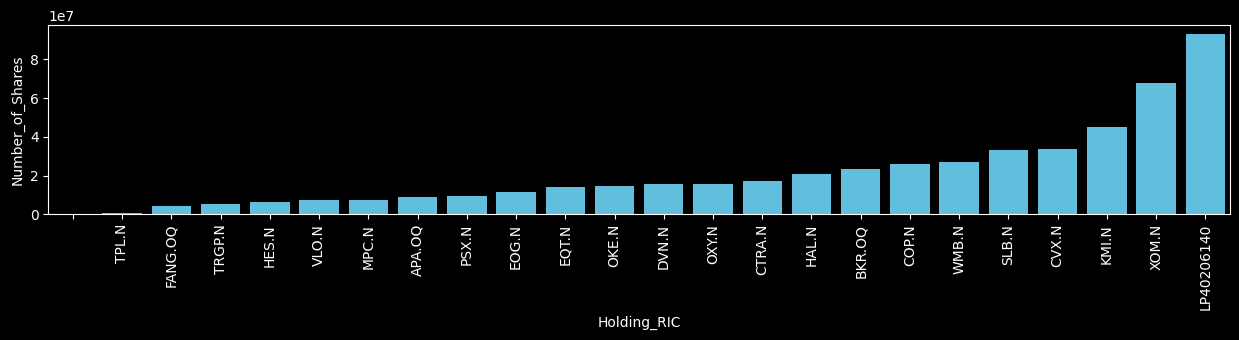

In [45]:
XLE2 = XLE[~XLE['Holding_Name'].isin(list_values)].set_index('Holding_RIC')['Number_of_Shares'].sort_values().to_frame()
type(XLE2)
bar_plot = sns.barplot(x=XLE2.index, y=XLE2['Number_of_Shares'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [46]:
help(ld.get_data)

Help on function get_data in module lseg.data._access_layer.get_data_func:

get_data(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str]], parameters: Union[str, dict, NoneType] = None, header_type: lseg.data.content._header_type.HeaderType = <HeaderType.TITLE: 2>) -> pandas.core.frame.DataFrame
    Retrieves pricing snapshots, as well as Fundamental and Reference data.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list
        Fields to request
    parameters: str | dict, optional
        Single key=value global parameter or dictionary of global parameters to request
    header_type: HeaderType, default HeaderType.TITLE
        If HeaderType.TITLE - returns field title as column headers for data
        If HeaderType.NAME - returns field name as column headers for data
        If HeaderType.NAME_AND_TITLE - returns field name and title as column headers for data
    
    Returns
    -------
    pandas.Dat

# Descargar series de tiempo

In [47]:
#help(rd.get_timeseries)

In [80]:
df_ts = ld.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = "2016-06-13", end = "2016-06-20")

In [81]:
df_ts

000001.SZ,BID,ASK
Date,,
2016-06-13,8.599997,8.60833
2016-06-14,8.65833,8.666663
2016-06-15,8.699997,8.70833
2016-06-16,8.57,8.58
2016-06-17,8.57,8.58
2016-06-20,8.59,8.6


In [50]:
import datetime as dt
today = dt.date.today()
d = today - dt.timedelta(days=100)
print(today, d)

2025-02-25 2024-11-17


In [52]:
df_ts = ld.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = d, end = today)
df_ts

000001.SZ,BID,ASK
Date,,
2024-11-18,11.75,11.76
2024-11-19,11.67,11.68
2024-11-20,11.64,11.65
2024-11-21,11.58,11.59
2024-11-22,11.28,11.29
...,...,...
2025-02-19,11.71,11.72
2025-02-20,11.66,11.67
2025-02-21,11.63,11.64


# Estadística Básica

In [82]:
dax_corto = dax['Instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 'HNKG_p.DE']

In [84]:
today = dt.datetime.today()
delta_day = today - dt.timedelta(days=100)
print(today, d)

2025-02-26 15:21:33.018523 2024-11-17 20:36:43.073658


In [89]:
df_ts_rndm = ld.get_history(['BASFn.DE'], fields = ['ASK'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")

Precios = df_ts_rndm.rename(columns={'ASK': 'BASFn.DE'})
Precios

BASFn.DE,BASFn.DE
Date,
2024-11-19,42.745
2024-11-20,42.34
2024-11-21,42.035
2024-11-22,42.565
2024-11-25,43.125
...,...
2025-02-20,47.99
2025-02-21,48.74
2025-02-24,49.07


In [90]:
for i in dax_corto[1:]:
    print(i)
    w = ld.get_history([i], fields = ['ASK'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")
    w1 = w.rename(columns={'ASK': i})
    Precios = Precios.join(w1, lsuffix="_left", rsuffix="_right")

IFXGn.DE
SIEGn.DE
EONGn.DE
DBKGn.DE
SATG_p.DE
SAPG.DE
BAYGn.DE
RWEG.DE
HNKG_p.DE


In [91]:
Precios

,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
Date,,,,,,,,,,
2024-11-19,42.745,29.13,178.14,11.675,15.878,209.0,219.95,20.2,31.47,78.62
2024-11-20,42.34,29.19,176.32,11.585,15.914,205.6,221.0,19.604,31.01,78.0
2024-11-21,42.035,29.115,176.02,11.62,16.01,203.6,224.45,19.52,30.78,78.32
2024-11-22,42.565,29.96,177.24,12.07,15.568,211.7,225.65,19.836,31.02,78.92
2024-11-25,43.125,30.485,180.88,12.17,15.732,216.6,224.2,19.926,30.94,78.74
...,...,...,...,...,...,...,...,...,...,...
2025-02-20,47.99,38.84,221.5,11.68,19.4,248.6,275.3,21.735,28.77,83.7
2025-02-21,48.74,38.6,220.85,11.73,19.62,241.9,273.65,22.025,29.14,83.8
2025-02-24,49.07,38.085,217.8,12.095,19.716,239.9,273.9,22.29,30.25,84.5


In [92]:
Precios.describe()

,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,HNKG_p.DE
count,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0
mean,44.965448,33.495597,198.845224,11.499254,17.721358,234.613433,250.969403,20.417209,29.603284,83.235821
std,2.655892,2.585497,13.459059,0.453447,1.372359,19.507729,18.529082,1.047527,1.096862,1.821669
min,41.47,29.115,176.02,10.505,15.454,203.6,219.95,18.86,28.15,78.0
25%,42.555,31.6525,190.25,11.18,16.742,217.15,238.3,19.515,28.62,82.82
50%,44.495,33.14,195.2,11.505,17.122,234.4,245.3,20.2,29.3,83.74
75%,46.9925,34.2675,207.525,11.8975,18.921,248.85,268.6,21.28,30.49,84.3
max,50.99,38.84,227.45,12.425,20.845,283.3,280.75,23.0,32.0,85.8


In [93]:
correlacion = Precios[dax_corto].corr()
print(correlacion)

           BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE  \
BASFn.DE   1.000000  0.840035  0.909882  0.119823  0.878120   0.627838   
IFXGn.DE   0.840035  1.000000  0.922823 -0.028580  0.819710   0.486320   
SIEGn.DE   0.909882  0.922823  1.000000 -0.096169  0.926589   0.652373   
EONGn.DE   0.119823 -0.028580 -0.096169  1.000000 -0.186169  -0.314974   
DBKGn.DE   0.878120  0.819710  0.926589 -0.186169  1.000000   0.755830   
SATG_p.DE  0.627838  0.486320  0.652373 -0.314974  0.755830   1.000000   
SAPG.DE    0.875583  0.871911  0.948756 -0.213926  0.946973   0.795507   
BAYGn.DE   0.849237  0.713284  0.816846 -0.033376  0.916642   0.748942   
RWEG.DE   -0.294215 -0.461784 -0.484694  0.734132 -0.444379  -0.377006   
HNKG_p.DE  0.488297  0.590907  0.632568 -0.290165  0.563068   0.517046   

            SAPG.DE  BAYGn.DE   RWEG.DE  HNKG_p.DE  
BASFn.DE   0.875583  0.849237 -0.294215   0.488297  
IFXGn.DE   0.871911  0.713284 -0.461784   0.590907  
SIEGn.DE   0.948756  0.816

<Axes: >

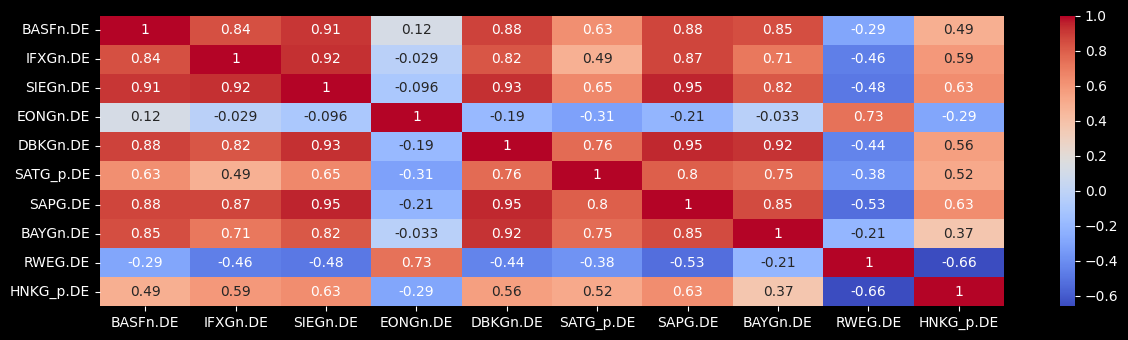

In [94]:
sns.heatmap(Precios[dax_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
Seleccionar un índice o fondo 
Calcular el rendimiento del fondo o índice 
- 1 año para atrás hoy y 
- lo van comparar a 2 años atrás a 1 año
Filtro de Clenow a los instrumuentos que son más dinámicos del periodo 2 años atrás a 1 año (2021 a 2022)
- rendimientos en el periodo de 1 año para atrás hoy (2022 a 2023)

Si se cumple o no la hipotésis que plantea Clenow